## Вступление

Банки играют ключевую роль в рыночной экономике. Они решают, кто получит финансирование и на каких условиях, и могут влиять на инвестиционные решения, как в положительную, так и в отрицательную сторону. Для функционирования рынков и общества, как физическим лицам, так и компаниям, необходим доступ к кредитам.

Алгоритмы кредитного скоринга, которые прогнозируют вероятность дефолта, являются инструментом, используемым банками для принятия решения о выдаче кредита. Конкуренция в этой области требует от участников совершенствования существующих методов кредитного скоринга путем прогнозирования вероятности того, что заемщик окажется в финансовом затруднении в течение следующих двух лет.

Целью данного конкурса является создание модели, которую заемщики могут использовать для принятия наилучших финансовых решений.

Предоставлены исторические данные о 250 000 заемщиках.

Ссылка: https://www.kaggle.com/competitions/GiveMeSomeCredit/overview

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 5.5 MB/s eta 0:00:00


In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

from sklearn.preprocessing import scale, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

## Данные и переменные

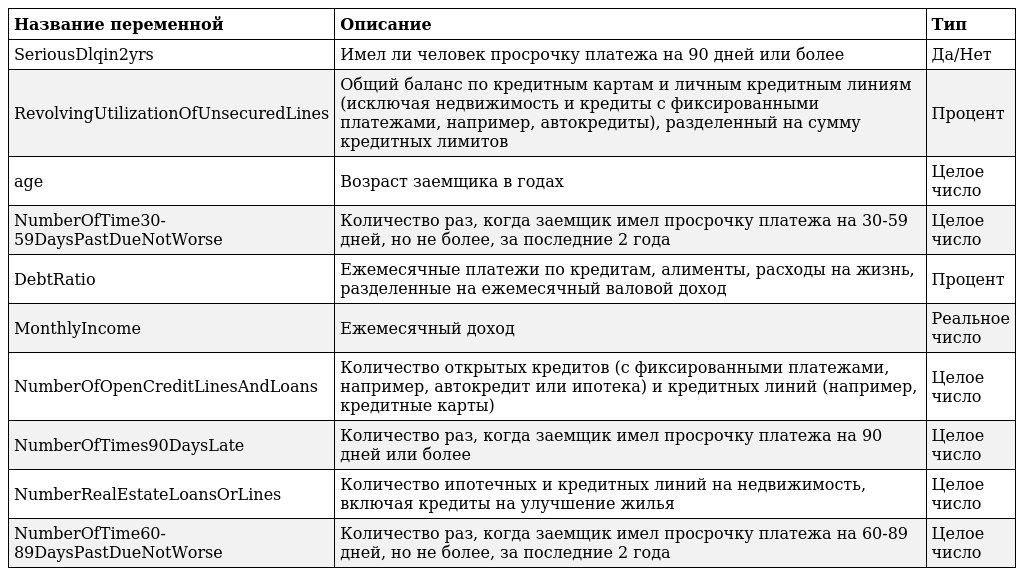

In [23]:
link = '/content/drive/MyDrive/Analytics/Credit_Scoring/'
train = pd.read_csv(link + 'cs-training.csv', index_col=0)
test = pd.read_csv(link + 'cs-test.csv', index_col=0)

In [24]:
train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [25]:
test.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [26]:
test = test.drop(['SeriousDlqin2yrs'], axis=1)
test.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
2,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
3,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
4,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
5,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [27]:
train.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

## EDA

In [28]:
train.shape, test.shape

((150000, 11), (101503, 10))

In [29]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,150000.0,0.240387,4.155179,0.0,0.000000,0.000000,0.000000,98.0


In [30]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
RevolvingUtilizationOfUnsecuredLines,101503.0,5.310000,196.156039,0.0,0.030131,0.152586,0.564225,21821.0
age,101503.0,52.405436,14.779756,21.0,41.000000,52.000000,63.000000,104.0
NumberOfTime30-59DaysPastDueNotWorse,101503.0,0.453770,4.538487,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,101503.0,344.475020,1632.595231,0.0,0.173423,0.364260,0.851619,268326.0
MonthlyIncome,81400.0,6855.035590,36508.600375,0.0,3408.000000,5400.000000,8200.000000,7727000.0
NumberOfOpenCreditLinesAndLoans,101503.0,8.453514,5.144100,0.0,5.000000,8.000000,11.000000,85.0
NumberOfTimes90DaysLate,101503.0,0.296691,4.515859,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,101503.0,1.013074,1.110253,0.0,0.000000,1.000000,2.000000,37.0
NumberOfTime60-89DaysPastDueNotWorse,101503.0,0.270317,4.503578,0.0,0.000000,0.000000,0.000000,98.0
NumberOfDependents,98877.0,0.769046,1.136778,0.0,0.000000,0.000000,1.000000,43.0


In [31]:
train.isnull().sum()

,0
SeriousDlqin2yrs,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
NumberOfTime30-59DaysPastDueNotWorse,0
DebtRatio,0
MonthlyIncome,29731
NumberOfOpenCreditLinesAndLoans,0
NumberOfTimes90DaysLate,0
NumberRealEstateLoansOrLines,0
NumberOfTime60-89DaysPastDueNotWorse,0


In [32]:
test.isnull().sum()

,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
NumberOfTime30-59DaysPastDueNotWorse,0
DebtRatio,0
MonthlyIncome,20103
NumberOfOpenCreditLinesAndLoans,0
NumberOfTimes90DaysLate,0
NumberRealEstateLoansOrLines,0
NumberOfTime60-89DaysPastDueNotWorse,0
NumberOfDependents,2626


In [33]:
def show_hists(data, bins):
    fig, ax = plt.subplots(5, 2, figsize=(15, 36))

    sns.histplot(data['RevolvingUtilizationOfUnsecuredLines'], kde=True, ax=ax[0][0], bins=bins)
    ax[0][0].set_title("Distribution of RevolvingUtilizationOfUnsecuredLines", size=14)
    ax[0][0].set_xlabel("RevolvingUtilizationOfUnsecuredLines", size=12)
    ax[0][0].set_ylabel("Frequency", size=12)

    sns.histplot(data['age'], kde=True, ax=ax[0][1], bins=bins)
    ax[0][1].set_title("Distribution of Ages", size=14)
    ax[0][1].set_xlabel("Age", size=12)
    ax[0][1].set_ylabel("Frequency", size=12)

    sns.histplot(data['NumberOfTime30-59DaysPastDueNotWorse'], kde=True, ax=ax[1][0], bins=bins)
    ax[1][0].set_title("Distribution of NumberOfTime30-59DaysPastDueNotWorse", size=14)
    ax[1][0].set_xlabel("NumberOfTime30-59DaysPastDueNotWorse", size=12)
    ax[1][0].set_ylabel("Frequency", size=12)

    sns.histplot(data['DebtRatio'], kde=True, ax=ax[1][1], bins=bins)
    ax[1][1].set_title("Distribution of DebtRatio", size=14)
    ax[1][1].set_xlabel("DebtRatio", size=12)
    ax[1][1].set_ylabel("Frequency", size=12)

    sns.histplot(data['MonthlyIncome'], kde=True, ax=ax[2][0], bins=bins)
    ax[2][0].set_title("Distribution of MonthlyIncome", size=14)
    ax[2][0].set_xlabel("MonthlyIncome", size=12)
    ax[2][0].set_ylabel("Frequency", size=12)

    sns.histplot(data['NumberOfOpenCreditLinesAndLoans'], kde=True, ax=ax[2][1], bins=bins)
    ax[2][1].set_title("Distribution of NumberOfOpenCreditLinesAndLoans", size=14)
    ax[2][1].set_xlabel("NumberOfOpenCreditLinesAndLoans", size=12)
    ax[2][1].set_ylabel("Frequency", size=12)

    sns.histplot(data['NumberOfTimes90DaysLate'], kde=True, ax=ax[3][0], bins=bins)
    ax[3][0].set_title("Distribution of NumberOfTimes90DaysLate", size=14)
    ax[3][0].set_xlabel("NumberOfTimes90DaysLate", size=12)
    ax[3][0].set_ylabel("Frequency", size=12)

    sns.histplot(data['NumberRealEstateLoansOrLines'], kde=True, ax=ax[3][1], bins=bins)
    ax[3][1].set_title("Distribution of NumberRealEstateLoansOrLines", size=14)
    ax[3][1].set_xlabel("NumberRealEstateLoansOrLines", size=12)
    ax[3][1].set_ylabel("Frequency", size=12)

    sns.histplot(data['NumberOfTime60-89DaysPastDueNotWorse'], kde=True, ax=ax[4][0], bins=bins)
    ax[4][0].set_title("Distribution of NumberOfTime60-89DaysPastDueNotWorse", size=14)
    ax[4][0].set_xlabel("NumberOfTime60-89DaysPastDueNotWorse", size=12)
    ax[4][0].set_ylabel("Frequency", size=12)

    sns.histplot(data['NumberOfDependents'], kde=True, ax=ax[4][1], bins=bins)
    ax[4][1].set_title("Distribution of NumberOfDependents", size=14)
    ax[4][1].set_xlabel("NumberOfDependents", size=12)
    ax[4][1].set_ylabel("Frequency", size=12)

    plt.show()

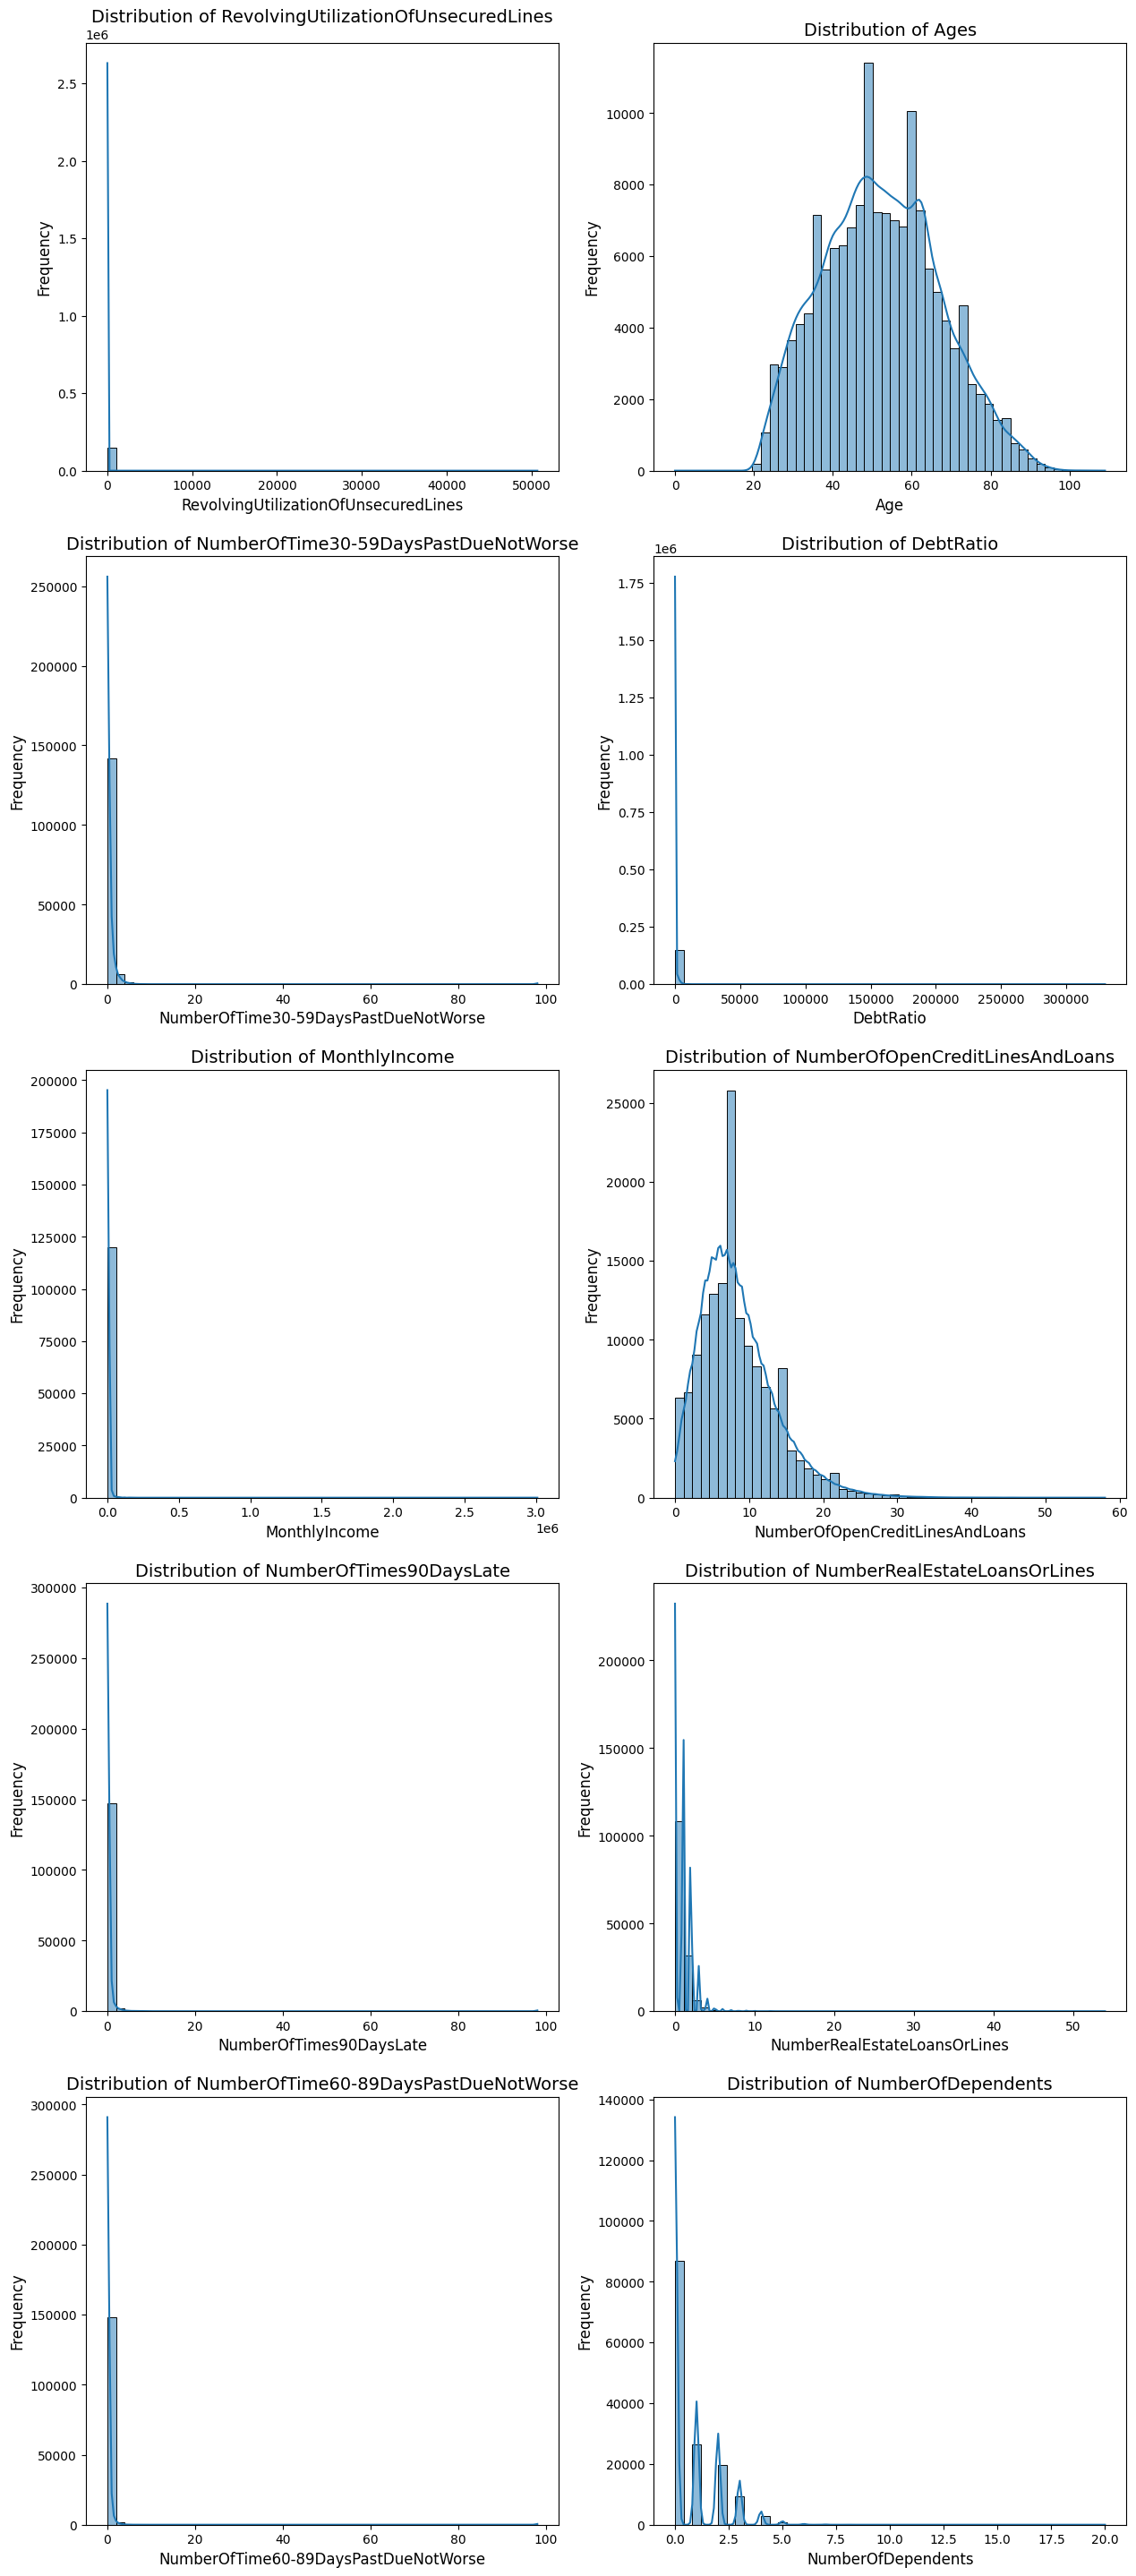

In [34]:
show_hists(train, 50)

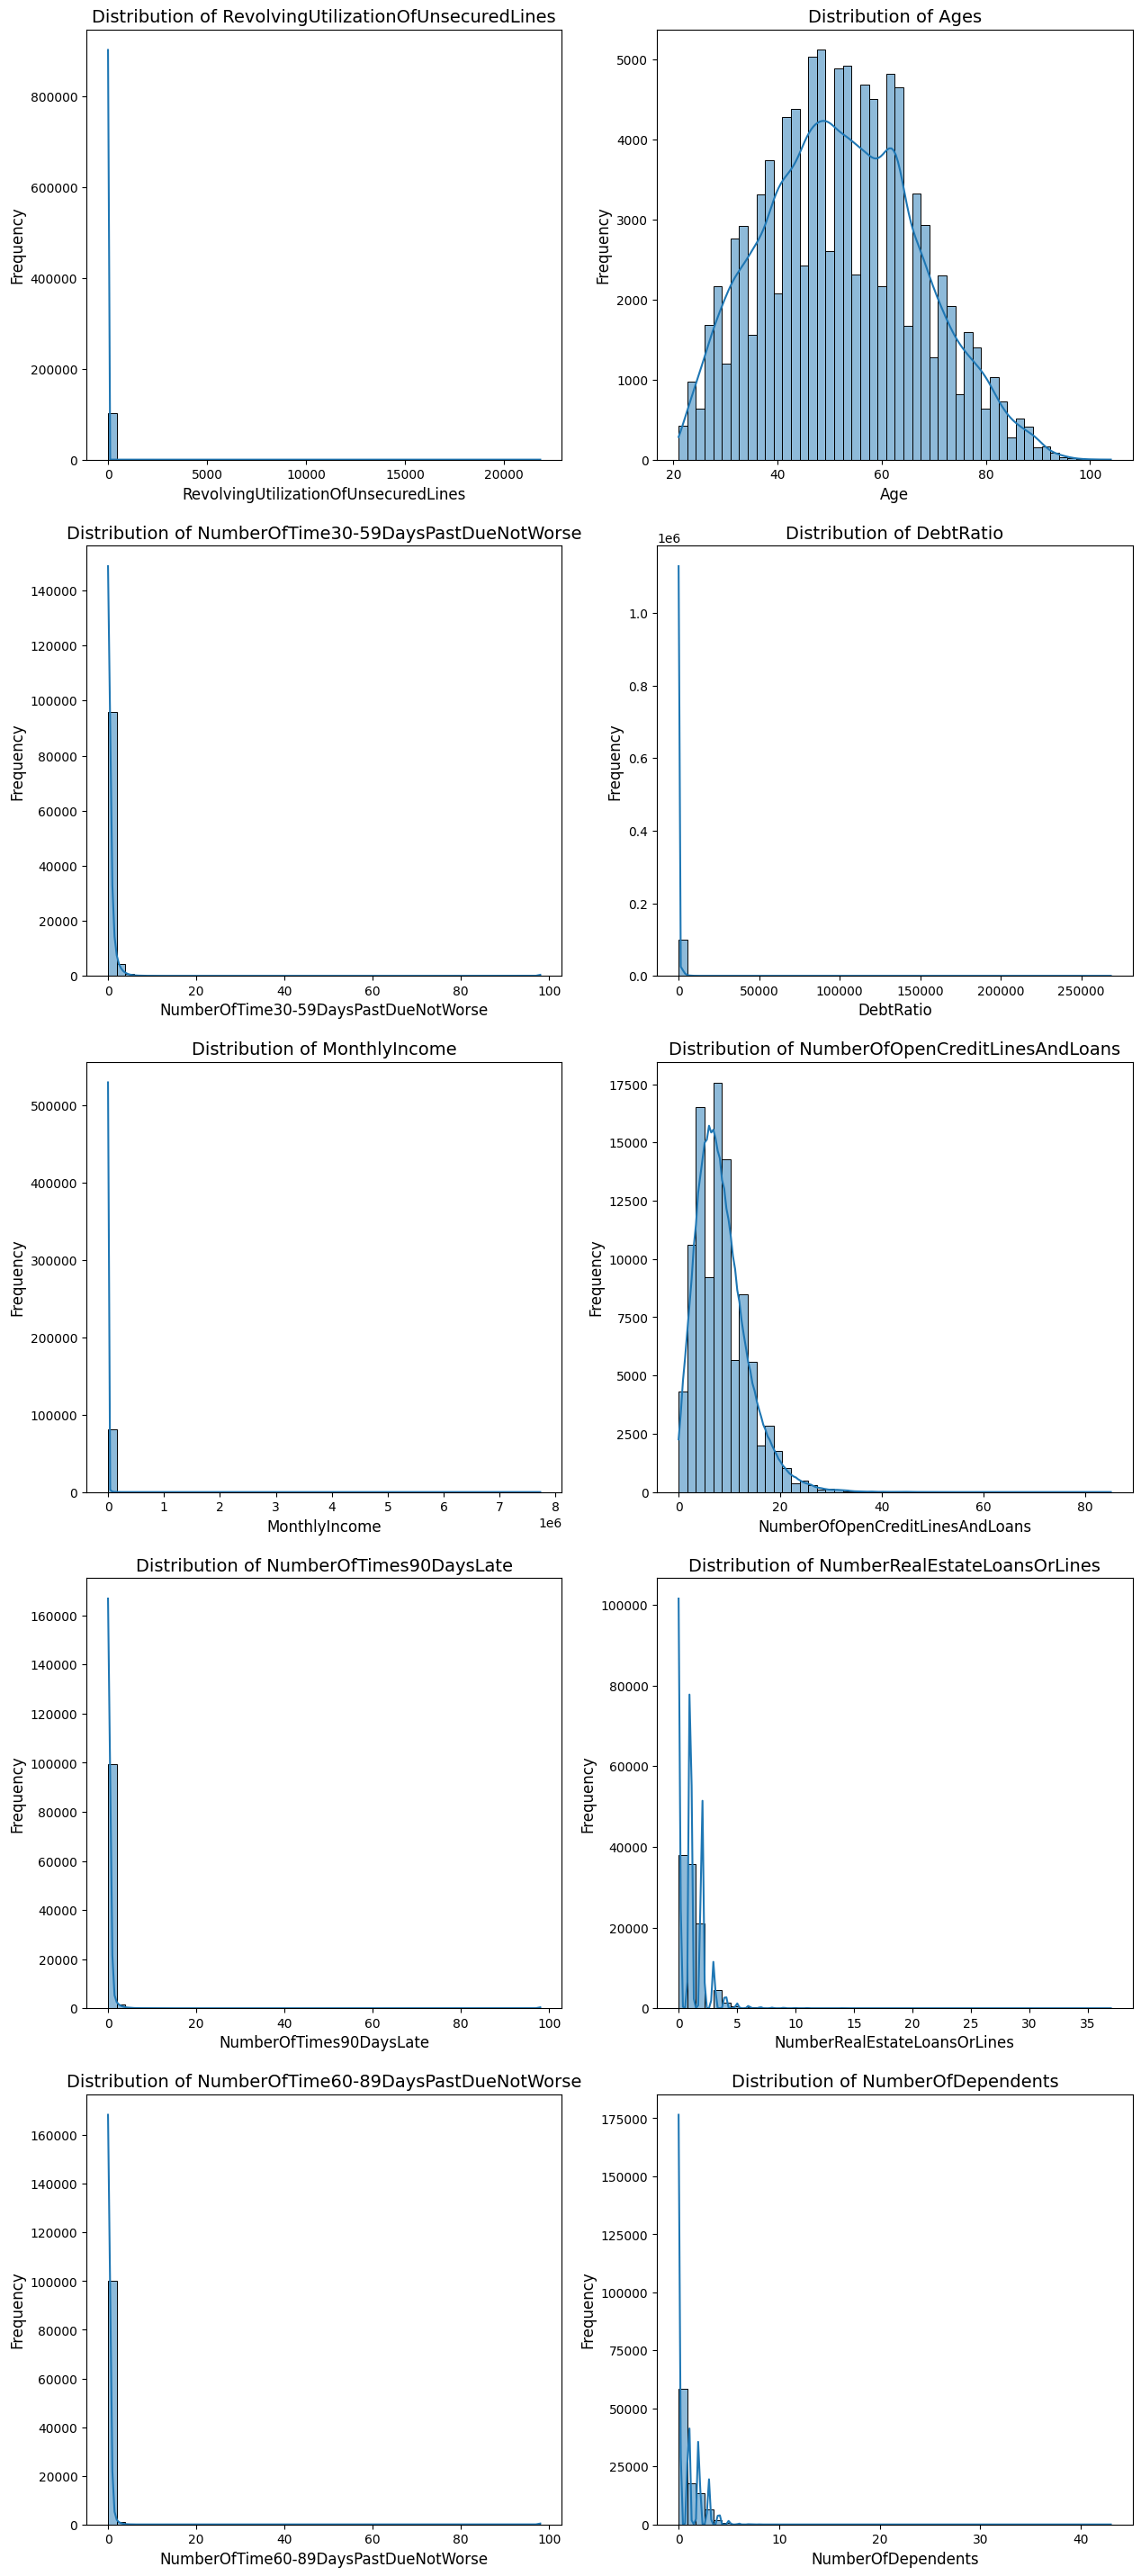

In [35]:
show_hists(test, 50)

In [37]:
numeric_columns = [
    'RevolvingUtilizationOfUnsecuredLines',
    'age',
    'NumberOfTime30-59DaysPastDueNotWorse',
    'DebtRatio',
    'MonthlyIncome',
    'NumberOfOpenCreditLinesAndLoans',
    'NumberOfTimes90DaysLate',
    'NumberRealEstateLoansOrLines',
    'NumberOfTime60-89DaysPastDueNotWorse',
    'NumberOfDependents'
]

missing_columns = [
    'MonthlyIncome',
    'NumberOfDependents'
]

In [43]:
def median_column(data, column):
    not_null_data = data[data[column].notnull()]
    not_null_data = not_null_data[[column, 'SeriousDlqin2yrs']] \
        .groupby(['SeriousDlqin2yrs'])[column] \
        .median().reset_index()
    return not_null_data[column]

def replace_median():
    for column in missing_columns:
        train.loc[
            (train['SeriousDlqin2yrs'] == 0) & \
            (train[column].isnull() == 1), column
        ] = median_column(train, column)[0]
        train.loc[
            (train['SeriousDlqin2yrs'] == 1) & \
            (train[column].isnull() == 1), column
        ] = median_column(train, column)[1]

        test.loc[(train[column].isnull() == 1), column] = test[column].median()
    return train, test

In [44]:
train, test = replace_median()

In [47]:
for feature in numeric_columns:
    Q1 = train[feature].quantile(0.05)
    Q3 = train[feature].quantile(0.95)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    if train[(train[feature] > upper)].any(axis=None):
        print(f"{feature}: YES")
    else:
        print(f"{feature}: NO")

RevolvingUtilizationOfUnsecuredLines: YES
age: NO
NumberOfTime30-59DaysPastDueNotWorse: YES
DebtRatio: YES
MonthlyIncome: YES
NumberOfOpenCreditLinesAndLoans: YES
NumberOfTimes90DaysLate: YES
NumberRealEstateLoansOrLines: YES
NumberOfTime60-89DaysPastDueNotWorse: YES
NumberOfDependents: YES


In [50]:
train['SeriousDlqin2yrs'].value_counts()

,count
SeriousDlqin2yrs,
0,139974
1,10026


## Data Preprocessing

In [51]:
target = 'SeriousDlqin2yrs'
y = train[target]
X = train.drop([target], axis=1)

columns = X.columns
index = X.index

transformer = ColumnTransformer([
    ('StandardScaler', StandardScaler(), X.columns)
])
X = transformer.fit_transform(X)
X = pd.DataFrame(X, columns=columns, index=index)
X.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,-0.021150,-0.493860,0.376593,-0.172833,0.209395,0.883657,-0.063793,4.409546,-0.057852,1.140530
2,-0.020385,-0.832342,-0.100419,-0.173168,-0.296402,-0.865297,-0.063793,-0.901283,-0.057852,0.237202
3,-0.021582,-0.967735,0.138087,-0.173186,-0.262114,-1.253953,0.176056,-0.901283,-0.057852,-0.666126
4,-0.023281,-1.509307,-0.100419,-0.173210,-0.242099,-0.670969,-0.063793,-0.901283,-0.057852,-0.666126
5,-0.020585,-0.223074,0.138087,-0.173215,4.434816,-0.282312,-0.063793,-0.016145,-0.057852,-0.666126


## Обучение

In [52]:
def stat_intervals(stat, alpha=0.05):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [56]:
models = []
random_state = 123
models.append(('LogisticRegression', LogisticRegression(random_state=random_state)))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('DecisionTree', DecisionTreeClassifier(random_state=random_state)))
models.append(('RandomForest', RandomForestClassifier(random_state=random_state)))
models.append(('XGB', GradientBoostingClassifier(random_state=random_state)))
models.append(('LightGBM', LGBMClassifier(verbose=-1, random_state=random_state)))
models.append(('CatBoost', CatBoostClassifier(verbose=False, random_state=random_state)))

In [57]:
for name, model in models:
    results = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
    boundaries = stat_intervals(results)
    print(f"{name}: {round(results.mean(), 4)} [{round(boundaries[0], 4)}, {round(boundaries[1], 4)}]")

LogisticRegression: 0.7016 [0.696, 0.7052]
KNeighborsClassifier: 0.6985 [0.6912, 0.7092]
DecisionTree: 0.6716 [0.6668, 0.6764]
RandomForest: 0.8789 [0.8759, 0.8826]
XGB: 0.9003 [0.8981, 0.9039]
LightGBM: 0.9018 [0.8994, 0.9051]
CatBoost: 0.901 [0.899, 0.9046]


In [61]:
del models

In [66]:
params_catboost = {
    "random_state": 123,
    "loss_function":"Logloss",
    "eval_metric":"AUC",
    'learning_rate': 0.03,
    'iterations': 2000,
    'objective': 'CrossEntropy',
    'depth': 4,
    'boosting_type': 'Ordered',
    'bootstrap_type': 'MVS',
    'verbose': False
}

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=random_state
)

catboost_model = CatBoostClassifier(**params_catboost)
catboost_model = catboost_model.fit(X_train, y_train)

In [73]:
y_pred = catboost_model.predict_proba(X_test)[:, 1]

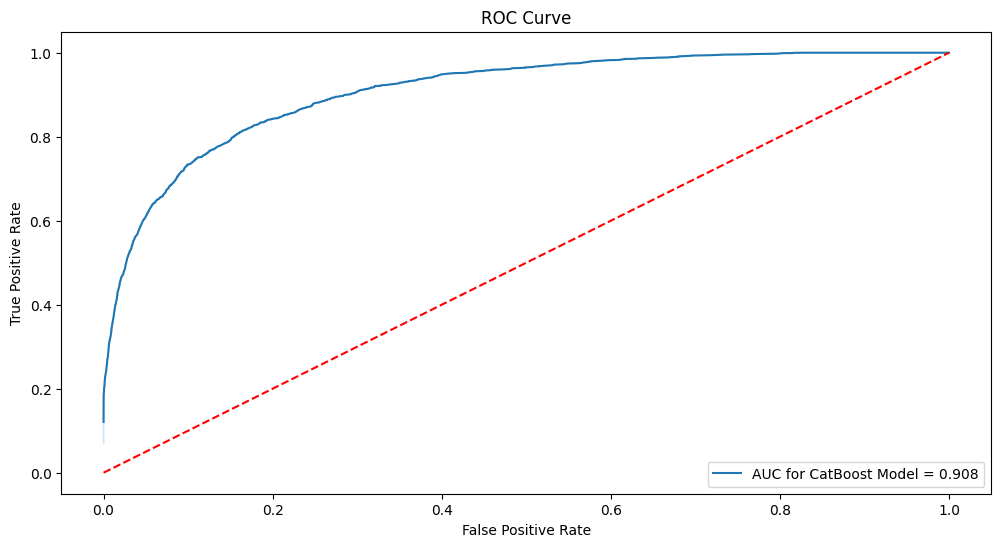

ROC-AUC: 0.908


In [77]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc_metric = auc(fpr, tpr)
roc_auc = roc_auc_score(y_test, y_pred)
plt.figure(figsize=(12,6))
plt.title('ROC Curve')
sns.lineplot(x=fpr, y=tpr, label=f'AUC for CatBoost Model = {round(auc_metric, 4)}')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print(f"ROC-AUC: {round(roc_auc, 4)}")

In [78]:
def feature_importance_show(model):
    feature_imporance = pd.Series(
        model.feature_importances_, index=columns
    ).sort_values(ascending=False)

    sns.barplot(x=feature_imporance, y=feature_imporance.index)
    plt.xlabel('Significance Score Of Variables')
    plt.ylabel('Variables')
    plt.title("Variable Severity Levels")
    plt.show()

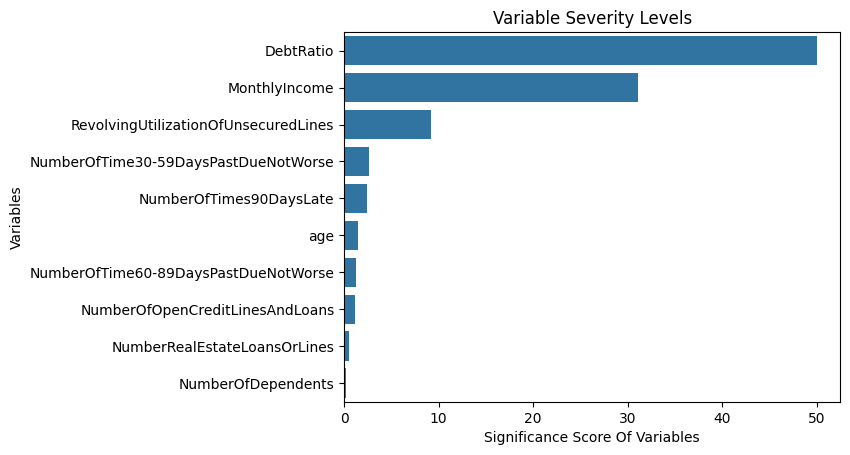

In [79]:
feature_importance_show(catboost_model)

## Выводы

CatBoost - круто.